In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, cohen_kappa_score
import warnings

warnings.filterwarnings('ignore', category=DeprecationWarning)

In [4]:
credit = pd.read_csv('C:/Users/Greg/Downloads/creditcardfraud/creditcard.csv')
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Text(0, 0.5, 'Frequency')

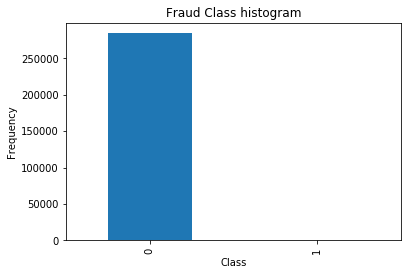

In [5]:
count_classes = pd.value_counts(credit['Class'], sort=True).sort_index()
count_classes.plot(kind = 'bar')
plt.title('Fraud Class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')

In [14]:
X = credit.iloc[:, :-1]
y = credit['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
logistic = linear_model.LogisticRegression(C=.01)
logistic.fit(X_train, y_train)
print('Score: ', logistic.score(X_test, y_test))

c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score:  0.9988413328183702


In [8]:
y_predicted = np.array(logistic.predict(X_test))
y_right = np.array(y_test)

In [26]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False,
                      title='Non-Normalized confusion matrix')

print('Recall metric in the testing dataset: ', cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print('Score: ', logistic.score(X_test, y_test))

NameError: name 'class_names' is not defined

<Figure size 432x288 with 0 Axes>

In [18]:
fraud_records = len(credit[credit.Class == 1])
fraud_indices = credit[credit.Class == 1].index
normal_indices = credit[credit.Class == 0].index
under_sample_indices = np.random.choice(normal_indices, fraud_records, False)

credit_undersampled = credit.iloc[np.concatenate([fraud_indices,under_sample_indices]),:]

X_undersampled = credit_undersampled.ix[:,1:29]
y_undersampled = credit_undersampled.Class

X_undersampled_train, X_undersampled_test, y_undersampled_train, y_undersampled_test = train_test_split(X_undersampled,y_undersampled,test_size = 0.3)
lr_undersampled = LogisticRegression(C=.01)


y_full_pred = lr_undersampled.fit(X_undersampled_train, y_undersampled_train)

print('Score: ', lr_undersampled.score(X_undersampled_test, y_undersampled_test))


Score:  0.9527027027027027


c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [19]:
y_predicted2 = np.array(lr_undersampled.predict(X_undersampled_test))
y_right2 = np.array(y_test)

In [25]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_undersampled_test, y_predicted2)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False,
                      title='Non-Normalized confusion matrix')

print('Recall metric in the testing dataset: ', cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print('Score: ', lr_undersampled.score(X_undersampled_test, y_undersampled_test))

NameError: name 'class_names' is not defined

<Figure size 432x288 with 0 Axes>

### The first regression we did had a very high accuracy, but the recall was very poor, letting 43% of fraud transactions through. After undersampling the credit data we lost some of our accuracy but increased our recall to 93% !!